In [8]:
"""
Solve the heat equation 
u_{tt} = c^2 u_{xx} on 0<x<L
with boundary conditions
u_x(0) = a(u(0)-g(t))
u_x(L) = 0
by an explicit finite difference scheme. 
"""
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

tend = 5                # 0 <= t <= tend
L = 1                   # 0 <= x <= L 
c2 = 1                  # diffusivity
a = np.pi/4             # heat transfer coefficient at x=0

# choose suitable step lengths!
h, k = 0.1, 0.01              # Stepsizes in space (x) and time (t).
M = int(L/h)            # Number of grid intervals
h = L/M                 # To ensure a uniform grid in x.
N = int(tend/k)         # Number of steps in the t-direction

# The grid
x = np.array([i*h for i in range(M+1)])
t = np.array([n*k for n in range(N+1)])

# initial value
def f(x):
    # Fill in your own code
    return (np.cos(np.pi*x/4)+np.sin(np.pi*x/4)) 

# boundary condition
def g(t):
    # Fill in your own code
    return np.zeros_like(t)

# Array for storing the solution
# U[i,n] \approx u(x_i,t_n)
U = np.zeros((M+1, N+1))

# Set up the matrix C
alpha = (c2*k)/h
C = np.zeros((M+1,M+1))
# First row
C[0, 0] = alpha*a*h + 1 - 2*alpha
C[0, 1] = -2*alpha
# Last row
C[M, M-1] = -2*alpha
C[M, M] = 1 - 2*alpha

# Other rows
for i in range(1, M):
    C[i, i-1] = -alpha
    C[i, i] = 1-2*alpha
    C[i, i+1] = -alpha

# If necessary, set up the matrix D
# (if you are implementing an implicit Euler method, you won't need this)
#D = np.zeros((M+1,M+1))

# Vector for the inhomogeneities
b = np.zeros(M+1)

# === Fill in your own code ===
# First row
for i in range (0, M+1):
     U[i, 0] = f(x[i])
for j in range(1, N):
    b[0] = alpha * a * h * g(t[j-1])
    # U_n+1 = C^-1*(U_n + B)
    U[:, j] = np.dot(np.linalg.inv(C), U[:, j-1] + b)
print(U)
# === end own code ===

# Also the code for this doesn't work, I can't find the bug sadly

[[1.00000000e+000 1.68163376e+000 2.82185996e+000 ... 2.55306874e+110
  4.25266069e+110 0.00000000e+000]
 [1.07537643e+000 1.79257263e+000 2.99008522e+000 ... 2.64890802e+110
  4.41230065e+110 0.00000000e+000]
 [1.14412281e+000 1.90518301e+000 3.17309545e+000 ... 2.73557630e+110
  4.55666433e+110 0.00000000e+000]
 ...
 [1.39680225e+000 2.32561405e+000 3.87204469e+000 ... 3.04848444e+110
  5.07787523e+110 0.00000000e+000]
 [1.40985401e+000 2.34734466e+000 3.90822519e+000 ... 3.06442042e+110
  5.10441971e+110 0.00000000e+000]
 [1.41421356e+000 2.35460312e+000 3.92031020e+000 ... 3.06973863e+110
  5.11327821e+110 0.00000000e+000]]


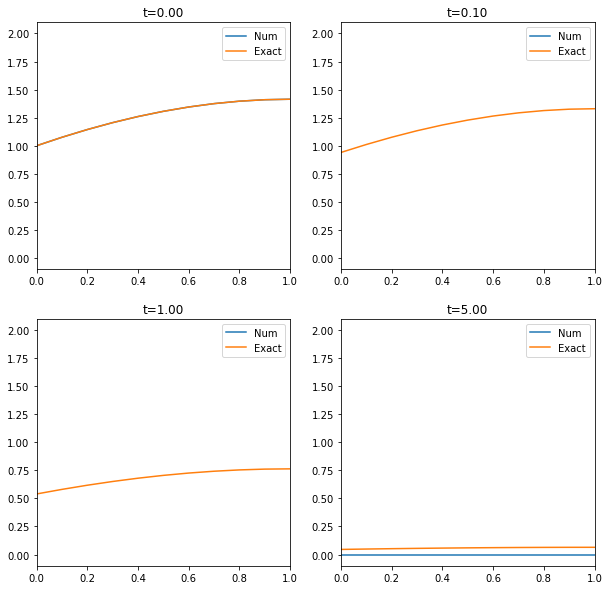

In [9]:
# The exact solution (if available)
def uexact(x,t):
    return (np.cos(np.pi*x/4)+np.sin(np.pi*x/4))*np.exp(-(np.pi**2)*t/16)

# Plot the solution together with the exact solution
plt.rcParams['figure.figsize'] = [10, 10]

t_plot = [0, 0.1, 1.0, 5.0]

for i in range(4):
    plt.subplot(2,2,i+1)
    nt = round(t_plot[i]/k)
    plt.plot(x,U[:,nt], label='Num')
    plt.plot(x,uexact(x,nt*k), label='Exact')
    plt.axis([0, L, -0.1, 2.1])
    plt.title(f't={nt*k:.2f}')
    plt.legend()


In [ ]:
# Animation

# First set up the figure, the axis, and the plot element we want to animate
plt.rcParams['figure.figsize'] = [6, 4]
fig, ax = plt.subplots()

ax.set_xlim(( 0, L))
ax.set_ylim((-2.1, 2.1))

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)
nt = round(t_plot[i]/k)

# animation function. This is called sequentially
# The animation is set to run for anim_length seconds independent
# of the number of time steps. For larger k (k >= 0.04 with the given setting)
# it might be necessary to lower the framerate.
anim_length = 10         # length of animation in seconds
framerate = 50           # number of frames per second
N_frames = anim_length*framerate
def animate(n):
    nt = round(tend*n/(N_frames*k))
    line.set_data(x, U[:,nt])
    plt.title(f't={t[nt]:.2f}')
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames = N_frames, interval=1000/framerate, blit=True)
HTML(anim.to_html5_video())